In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Zoals hierboven te zien is, zijn er een aantal rijen die 'NaN' bevatten. Om verdere foutmeldingen te voorkomen zullen deze rijen gedropt worden.

## Test/train split

In [6]:
penguins = penguins.dropna()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])
print (penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


## Training the model

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
features=['flipper_length_mm', 'body_mass_g']
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=4)

In [24]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    graph = graphviz.Source(dot_data)  
    graph.render("decision_tree")
    return graph 

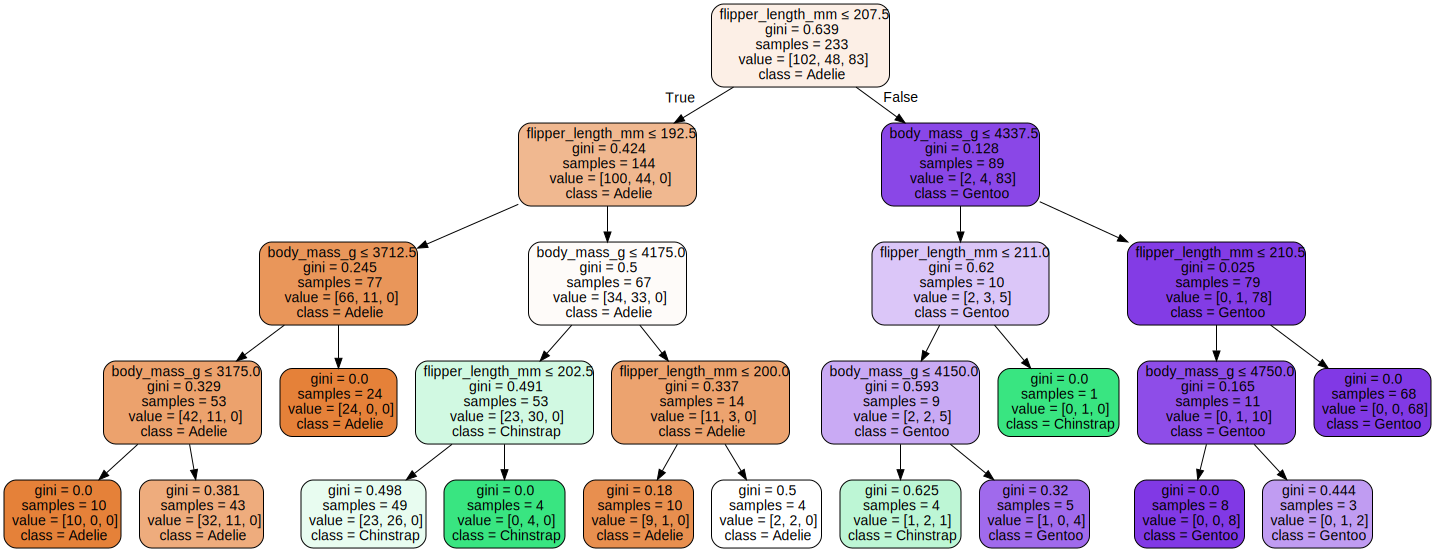

In [25]:
plot_tree_classification(dt, features, np.sort(penguins_train.species.unique()))

## Evaluating The Model

In [26]:
predictions = dt.predict(penguins[features])

In [27]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [30]:
predictionsOnTrainset = dt.predict(penguins_train[features])
predictionsOnTestset = dt.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8240343347639485
Accuracy on test set 0.78


Er is een klein verschil tussen de training set en de test set. Persoonlijk had ik verwacht dat het verschil tussen de nauwkeurigheid van de twee sets groter zou zijn aangezien de trainingset 70% van de data bevat en de test set maar 30%. Natuurlijk had ik niet verwacht dat het verschil van de nauwkeurigheid tussen de sets heel groot zou zijn, maar ik had wel verwacht dat het verschil 10 tot 15 procent zou bedragen.